# CS 1656 – Introduction to Data Science (Fall 2023) 

## Instructors: Alexandros Labrinidis, Xiaowei Jia
## Teaching Assistants: Evangelos Karageorgos, Xiaoting Li, Zi Han Ding

## Term Project 

**Released: November 1, 2023**

**Due: December 8, 2023**

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikes_pgh_data.ipynb` and a python file, called `calculations.py`, that will:
* [Task 1] access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from calculations import Calculations

# Feel free to add here any other libraries as specified in the project description
import sklearn
from sklearn import cluster

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [2]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

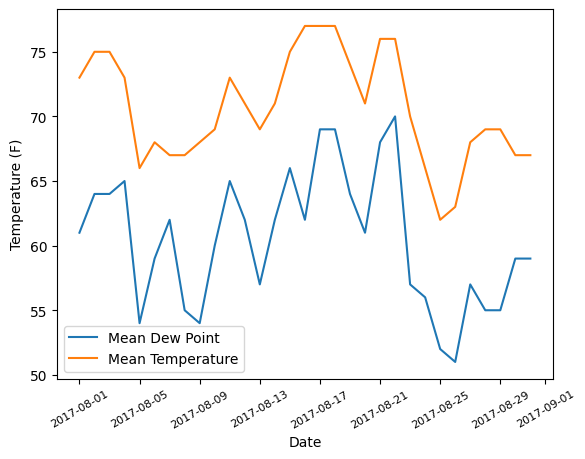

In [3]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('KPIT_Aug17.csv', sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])
plt.xticks(rotation=30, fontsize=8)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data.

### Running Calculations

In [4]:
calculations = Calculations(['HealthyRideRentals2021-Q1.csv', 'HealthyRideRentals2021-Q2.csv', 'HealthyRideRentals2021-Q3.csv'])

### Task 1.1

In [5]:
trips = calculations.get_trips()
trips.head(5)

,Bikeid,Starttime,Trip id,From station id,To station id
0,70782,2021-01-12 12:48:00,111375309,49641.0,1061.0
1,70578,2021-01-13 09:32:00,111390480,49391.0,1064.0
2,70935,2021-01-15 17:43:00,111441111,1072.0,1072.0
3,70910,2021-01-20 16:00:00,111529394,1068.0,1032.0
4,70910,2021-01-24 14:40:00,111609524,1032.0,1056.0


### Task 1.1

In [6]:
daily_counts = calculations.get_daily_counts()
daily_counts.head(10)

,day,station_id,fromCNT,toCNT,rebalCNT
0,01/01/2021,1002,1,1,0
1,01/01/2021,1010,1,0,1
2,01/01/2021,1024,1,1,0
3,01/01/2021,1028,1,1,0
4,01/01/2021,1032,1,0,1
5,01/01/2021,1059,1,1,0
6,01/01/2021,1062,2,2,0
7,01/01/2021,1094,2,0,2
8,01/01/2021,49301,1,2,1
9,01/01/2021,49671,1,0,1


### Task 1.2

In [7]:
monthly_counts = calculations.get_monthly_counts()
monthly_counts.head(10)

,month,station_id,fromCNT,toCNT,rebalCNT
0,01/2021,1000,23,29,6
1,01/2021,1001,18,27,9
2,01/2021,1002,27,27,0
3,01/2021,1003,2,1,1
4,01/2021,1004,20,16,4
5,01/2021,1005,6,3,3
6,01/2021,1006,8,8,0
7,01/2021,1007,9,7,2
8,01/2021,1009,8,3,5
9,01/2021,1010,47,30,17


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [8]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = "04/2021"
filter_stationID = 1046


### Task 2.1

Task 2.1 Show a bar chart for the 20 most popular bikestations when considering the number of fromCNT per station (for filter_month). Y axis should be the fromCNT per station, X axis should be the stationID. The first stationID corresponds to the most popular station.

Text(0.5, 1.0, 'Top 20 bike stations when considering fromCNT per station')

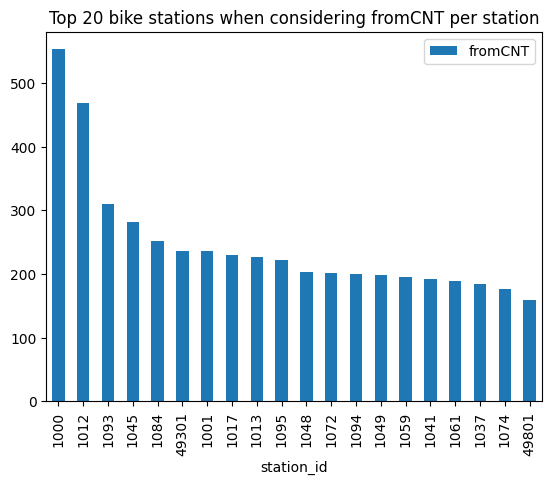

In [9]:
# Get the months with filter month
filtered = monthly_counts[monthly_counts['month'] == filter_month]

# Sort the values of the top 20 results in descending order 
filtered = filtered.sort_values(by=['fromCNT'], ascending=False).head(20)

# Plot the bar chart using df.plot
filtered.plot(kind='bar', x='station_id', y='fromCNT')

# Set the title
plt.title('Top 20 bike stations when considering fromCNT per station')

### Task 2.2

**Task 2.2** For the filter_month and for the filter_stationID show a graph that shows the distribution of bike rentals throughout the month, for that station only. Y axis should be the fromCNT for that stationID for that day, X axis would be the different days in that month (i.e., 1 - 30 for April).

<Axes: xlabel='day_labels'>

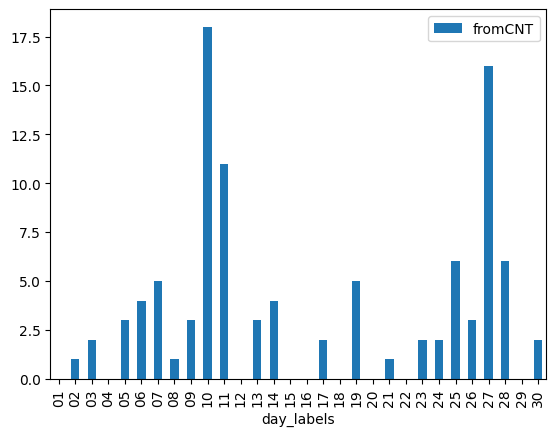

In [10]:
# Get the days in April
days = daily_counts[daily_counts['day'].str.startswith(filter_month[0:3])]

# Get the counts for the proper station_ids and sort by day
counts = days[days['station_id'] == filter_stationID].sort_values(by=['day'])

# For this, we need to just label the days by the day, not the entire date
labels = []
for idx, day in enumerate(counts['day']):
    labels.append(f'{day[3:5]}'.zfill(2))

counts['day_labels'] = labels

# Only care about the day and fromCNT columns, so only use these
counts = counts.drop({'station_id', 'toCNT', 'rebalCNT'}, axis=1)

# Missing days 1, 12, 15, 16, 22, 29 so we need to add them in

new_vals = pd.DataFrame({'day': ['04/01/2021', '04/12/2021', '04/15/2021', '04/16/2021', '04/22/2021', '04/29/2021'],
                        'fromCNT': [0, 0, 0, 0, 0, 0], 
                        'day_labels': ['01', '12', '15', '16', '22', '29']}, index=[0, 1, 2, 3, 4, 5])

df = [counts, new_vals]
fixed_counts = pd.concat(df, ignore_index=True).sort_values(by='day')
fixed_counts

# Plot the counts
fixed_counts.plot(kind='bar', x='day_labels', y='fromCNT')

### Task 2.3

**Task 2.3** For the filter_month (e.g., April) show a graph that shows the distribution of bike rentals throughout the day, for all stations. Y axis should be the fromCNT for all stations in the filter_month, X axis would be the different hours in a day (i.e., 0 - 23).

Text(0.5, 1.0, 'Number of bike rentals by hour in April')

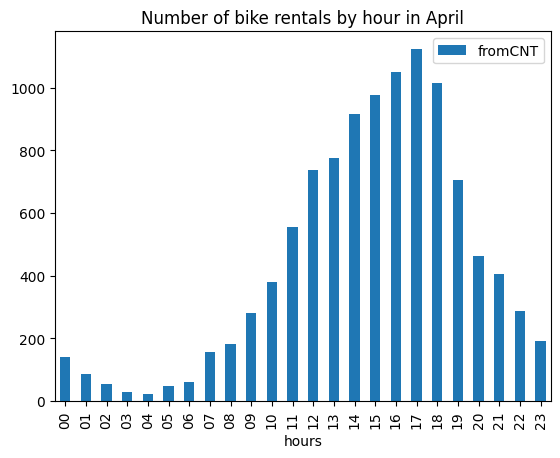

In [11]:
# Need to get the hour from the datetime object. Just reuse get_daily_counts code from Calculations
# to construct a DF that now contains the full datetime object and not just the date.

# DataFrame must have "day", "station_id", "fromCNT", "toCNT" and "rebalCNT" columns
from_df = trips[['Starttime', 'From station id']].copy()
to_df = trips[['Starttime', 'To station id']].copy()

# Get the counts by using groupby on the starttime then from/to station id. Get the counts by using size then convert
# the resulting Series to a DF. 
from_df = from_df.groupby([from_df["Starttime"], "From station id"]).size().to_frame(name='fromCNT').reset_index()
to_df = to_df.groupby([to_df["Starttime"], "To station id"]).size().to_frame(name='toCNT').reset_index()

# # Rename the column headers to the designated column headers in the README
from_df = from_df.rename(columns={'Starttime': 'day', 'From station id': 'station_id'})
to_df = to_df.rename(columns={'Starttime': 'day', 'To station id': 'station_id'})

# Merge the two dataframes together
master_df = pd.merge(from_df, to_df, on=['day', 'station_id'], how='outer')
# Handle NaNs in the master
master_df = master_df.fillna(0)

# TODO: Compute rebalance by implementing proper algorithm
# Use the approximation for rebalance
master_df['rebalCNT'] = abs(master_df['fromCNT'] - master_df['toCNT'])

# Handle proper date format
new_days = []
for idx in range(len(master_df['day'])):
    year_month_day = str(master_df['day'][idx]).split('-')
    year = year_month_day[0].zfill(4)
    month = year_month_day[1].zfill(2)
    day = year_month_day[2].zfill(2)
    
    new_day = f"{month}/{day}/{year}"
    new_days.append(new_day)

master_df['day'] = new_days

# Handle format of DF
master_df = master_df.astype({'day': str, 'station_id': int, 'fromCNT': int, 'toCNT': int, 'rebalCNT': int})

# print(master_df.head(10))
master_df.head(5)

# Add a new column that is just the hour
hours = []
for idx, datetime in enumerate(master_df['day']):
    hours.append(datetime[6:8])

master_df['hours'] = hours

# Get the April data
days_t23 = master_df[master_df['day'].str.startswith(filter_month[0:3])].sort_values(by=['hours'])

# Get the total counts for each hour
counts_t23 = days_t23.groupby(days_t23['hours']).sum('fromCNT').reset_index()

# Plot hours and fromCNT for each hour
counts_t23.plot(kind='bar', x='hours', y='fromCNT')

# Add title
plt.title('Number of bike rentals by hour in April')

### Task 2.4

**Task 2.4** Compute the total number of rentals each bike had for each day (regardless of station). In other words, figure out how many times a bike was listed in the input data, for each different date. For the filter_month, show a graph that shows the 20 most popular bikes. Y axis should be the number of times a bike was rented, X axis should be the bikeID. The first bikeID corresponds to the most popular station.

Text(0.5, 1.0, 'Top 20 Bike rentals in April')

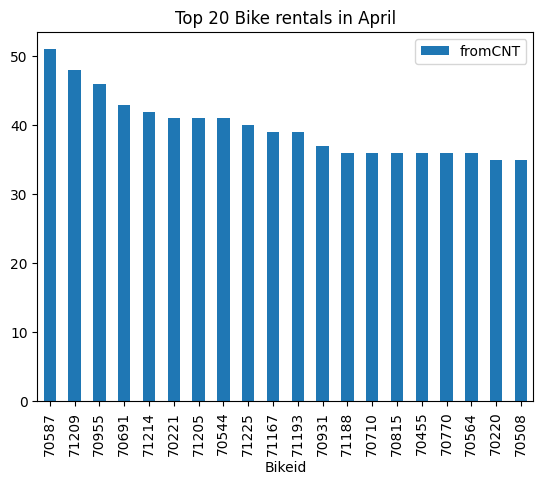

In [12]:
# Need to construct a DF that contains the date and bikeids

from_df = trips[['Starttime', 'Bikeid']].copy()
to_df = trips[['Starttime', 'Bikeid']].copy()

# Get the counts by using groupby on the starttime then from/to station id. Get the counts by using size then convert
# the resulting Series to a DF. 
from_df = from_df.groupby([from_df["Starttime"].dt.date, 'Bikeid']).size().to_frame(name='fromCNT').reset_index()
to_df = to_df.groupby([to_df["Starttime"].dt.date, 'Bikeid']).size().to_frame(name='toCNT').reset_index()

# # Rename the column headers to the designated column headers in the README
from_df = from_df.rename(columns={'Starttime': 'day'})
to_df = to_df.rename(columns={'Starttime': 'day'})

# Merge the two dataframes together
master_df_t24 = pd.merge(from_df, to_df, on=['day', 'Bikeid'], how='outer')
# Handle NaNs in the master
master_df_t24 = master_df_t24.fillna(0)

# Handle proper date format
new_days = []
for idx in range(len(master_df_t24['day'])):
    year_month_day = str(master_df_t24['day'][idx]).split('-')
    year = year_month_day[0].zfill(4)
    month = year_month_day[1].zfill(2)
    day = year_month_day[2].zfill(2)
    
    new_day = f"{month}/{day}/{year}"
    new_days.append(new_day)

master_df_t24['day'] = new_days

# Handle format of DF
master_df_t24 = master_df_t24.astype({'day': str, 'fromCNT': int, 'toCNT': int})

# Get the April data
days_t24 = master_df_t24[master_df_t24['day'].str.startswith(filter_month[0:3])].sort_values(by=['day'])

# Get the total counts for each bikeid
counts_t24 = days_t24.groupby(days_t24['Bikeid']).sum('fromCNT').reset_index()

# Sort the top 20 values
counts_t24 = counts_t24.sort_values(by=['fromCNT'], ascending=False).head(20)

# Plot bikeid and fromCNT for each hour
counts_t24.plot(kind='bar', x='Bikeid', y='fromCNT')

# Add title
plt.title('Top 20 Bike rentals in April')

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

**Task 3.1** Show a bar chart for the 20 most popular bikestations when considering the number of **rebalCNT** per station (for filter_month). Y axis should be the rebalCNT per station, X axis should be the stationID. The first stationID corresponds to the most demanding station in terms of rebalancing.

Text(0.5, 1.0, 'Top 20 bikestations according to rebalCNT')

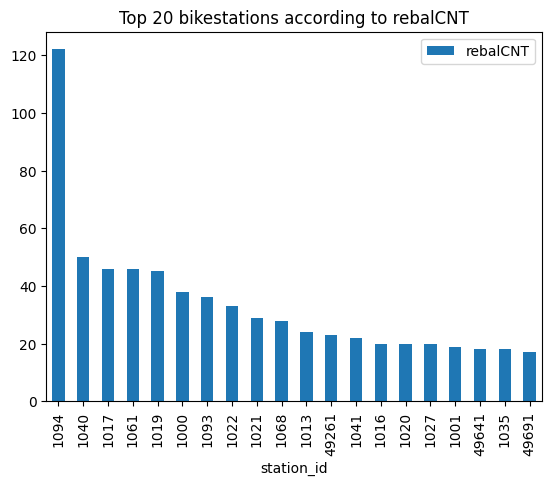

In [13]:
# Get the data for the filter month
filtered_monthly_counts = monthly_counts[monthly_counts['month'] == filter_month]

# Sort said values by the rebalance count and pull the top 20
filtered_monthly_counts = filtered_monthly_counts.sort_values(by=['rebalCNT'], ascending=False).head(20)

# Plot the rebalCNT against the station ids
filtered_monthly_counts.plot(kind='bar', x='station_id', y='rebalCNT')

# Set title
plt.title('Top 20 bikestations according to rebalCNT')

### Task 3.2

**Task 3.2** For the filter_month and for the filter_stationID show a graph that shows the distribution of bike rebalancing throughout the month, for that station only. Y axis should be the rebalCNT for that stationID for that day, X axis would be the different days in that month (i.e., 1 - 30 for April).

<Axes: xlabel='day_labels'>

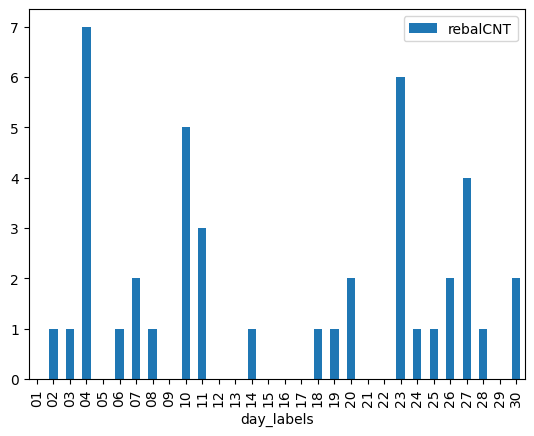

In [14]:
# This is similar to task 2.2 just with rebalCNT and not fromCNT

# Get the days in April
days = daily_counts[daily_counts['day'].str.startswith(filter_month[0:3])]

# Get the counts for the proper station_ids and sort by day
counts = days[days['station_id'] == filter_stationID].sort_values(by=['day'])

# For this, we need to just label the days by the day, not the entire date
labels = []
for idx, day in enumerate(counts['day']):
    labels.append(f'{day[3:5]}'.zfill(2))

counts['day_labels'] = labels

# Only care about the day and fromCNT columns, so only use these
counts = counts.drop({'station_id', 'toCNT', 'fromCNT'}, axis=1)

# Missing days 1, 12, 15, 16, 22, 29 so we need to add them in

new_vals = pd.DataFrame({'day': ['04/01/2021', '04/12/2021', '04/15/2021', '04/16/2021', '04/22/2021', '04/29/2021'],
                        'rebalCNT': [0, 0, 0, 0, 0, 0], 
                        'day_labels': ['01', '12', '15', '16', '22', '29']}, index=[0, 1, 2, 3, 4, 5])

df = [counts, new_vals]
fixed_counts = pd.concat(df, ignore_index=True).sort_values(by='day')
fixed_counts

# Plot the counts
fixed_counts.plot(kind='bar', x='day_labels', y='rebalCNT')

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

In [15]:
# Create the 6D data structure
master_6d = pd.DataFrame()
filter_month_1 = '04/'
filter_month_2 = '05/'
filter_month_3 = '06/'

# Get the data for month 1. Only want station_id, fromCNT and rebalCNT
month_1 = monthly_counts[monthly_counts['month'].str.startswith(filter_month_1)].drop({'month', 'toCNT'}, axis=1)
month_1 = month_1.rename({'fromCNT': 'fromCNT_month_1', 'rebalCNT': 'rebalCNT_month_1'}, axis=1)

# Get the data for month 1. Only want station_id, fromCNT and rebalCNT
month_2 = monthly_counts[monthly_counts['month'].str.startswith(filter_month_2)].drop({'month', 'toCNT'}, axis=1)
month_2 = month_2.rename({'fromCNT': 'fromCNT_month_2', 'rebalCNT': 'rebalCNT_month_2'}, axis=1)

# Get the data for month 1. Only want station_id, fromCNT and rebalCNT
month_3 = monthly_counts[monthly_counts['month'].str.startswith(filter_month_3)].drop({'month', 'toCNT'}, axis=1)
month_3 = month_3.rename({'fromCNT': 'fromCNT_month_3', 'rebalCNT': 'rebalCNT_month_3'}, axis=1)

# Merge the three DFs together
master_6d = pd.merge(month_1, month_2, on='station_id', how='outer').reset_index(drop=True)
master_6d = pd.merge(master_6d, month_3, on='station_id', how='outer').reset_index(drop=True)

# Drop NaNs. Needed for clustering
master_6d = master_6d.dropna()

master_6d

,station_id,fromCNT_month_1,rebalCNT_month_1,fromCNT_month_2,rebalCNT_month_2,fromCNT_month_3,rebalCNT_month_3
0,1000,553.0,38.0,834.0,48.0,811.0,21.0
1,1001,236.0,19.0,342.0,21.0,366.0,21.0
2,1002,145.0,11.0,97.0,10.0,144.0,9.0
3,1003,42.0,6.0,86.0,1.0,83.0,11.0
4,1004,111.0,1.0,118.0,2.0,89.0,4.0
...,...,...,...,...,...,...,...
101,49801,159.0,4.0,328.0,15.0,312.0,6.0
102,49881,38.0,7.0,22.0,9.0,28.0,15.0
103,49921,86.0,1.0,122.0,0.0,96.0,3.0
104,49951,84.0,2.0,135.0,2.0,132.0,7.0


### Task 4.1

**Task 4.1** You should perform clustering on the above 6-dimensional space using K-means (with at least 3 different values for K) and DBSCAN  (with at least three different value combinations for min_samples and eps) [https://scikit-learn.org/stable/modules/clustering.html#clustering](https://scikit-learn.org/stable/modules/clustering.html#clustering).


In [16]:
# wss_scores holds Within-Cluster-Sum of Squared scores. Use this to analyze the Elbow Plot in task 4.3
# Link: https://www.kaggle.com/code/funxexcel/p2-sklearn-k-means-elbow-and-silhouette-method

wss_scores = []

# Run kmeans
k_means_2_clusters = cluster.KMeans(n_clusters=2, init = 'k-means++', random_state=5000)
k_means_2_clusters.fit(master_6d[['fromCNT_month_1', 'rebalCNT_month_1', 
                        'fromCNT_month_2', 'rebalCNT_month_2', 
                        'fromCNT_month_3', 'rebalCNT_month_3', 
                        ]])

wss_scores.append(k_means_2_clusters.inertia_)
    
# Run kmeans
k_means_3_clusters = cluster.KMeans(n_clusters=3, init = 'k-means++', random_state=5000)
k_means_3_clusters.fit(master_6d[['fromCNT_month_1', 'rebalCNT_month_1', 
                        'fromCNT_month_2', 'rebalCNT_month_2', 
                        'fromCNT_month_3', 'rebalCNT_month_3', 
                        ]])

wss_scores.append(k_means_3_clusters.inertia_)

# Run kmeans
k_means_4_clusters = cluster.KMeans(n_clusters=4, init = 'k-means++', random_state=5000)
k_means_4_clusters.fit(master_6d[['fromCNT_month_1', 'rebalCNT_month_1', 
                        'fromCNT_month_2', 'rebalCNT_month_2', 
                        'fromCNT_month_3', 'rebalCNT_month_3', 
                        ]])

wss_scores.append(k_means_4_clusters.inertia_)

wss_scores

c:\Users\JMB442\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JMB442\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JMB442\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1865285.1870456047, 759434.1022784811, 520450.8340825841]

In [17]:
# Now, run DBScan with 3 different value combinations for eps and min_samples. Only adjust min_samples and keep eps constant
# To choose these values, I kind of just set values and did a trial/error thingy to get distinct looking clusters
# and not just everything lumped into the first cluster
eps = 25
samples = [4, 6, 8]

dbscan_1 = cluster.DBSCAN(eps=eps, min_samples=samples[0])
dbscan_1.fit(master_6d[['fromCNT_month_1', 'rebalCNT_month_1', 
                        'fromCNT_month_2', 'rebalCNT_month_2', 
                        'fromCNT_month_3', 'rebalCNT_month_3', 
                        ]])

dbscan_2 = cluster.DBSCAN(eps=eps, min_samples=samples[0])
dbscan_2.fit(master_6d[['fromCNT_month_1', 'rebalCNT_month_1', 
                        'fromCNT_month_2', 'rebalCNT_month_2', 
                        'fromCNT_month_3', 'rebalCNT_month_3', 
                        ]])

dbscan_3 = cluster.DBSCAN(eps=eps, min_samples=samples[0])
dbscan_3.fit(master_6d[['fromCNT_month_1', 'rebalCNT_month_1', 
                        'fromCNT_month_2', 'rebalCNT_month_2', 
                        'fromCNT_month_3', 'rebalCNT_month_3', 
                        ]])

DBSCAN(eps=25, min_samples=4)

### Task 4.2

**Task 4.2** You should generate one bar chart per algorithm option (i.e., 6 different charts) showing the distribution of the number of stations per cluster. Y axis should be the number of stations in that cluster, X axis would be the clusterID. The first clusterID corresponds to the biggest cluster. Make sure each graph is properly labeled with the algorithm name and the parameters used.

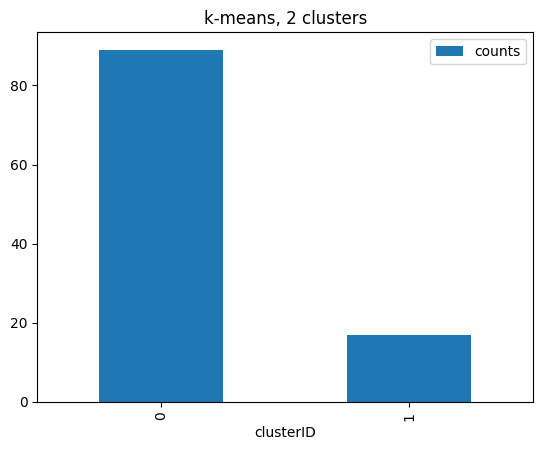

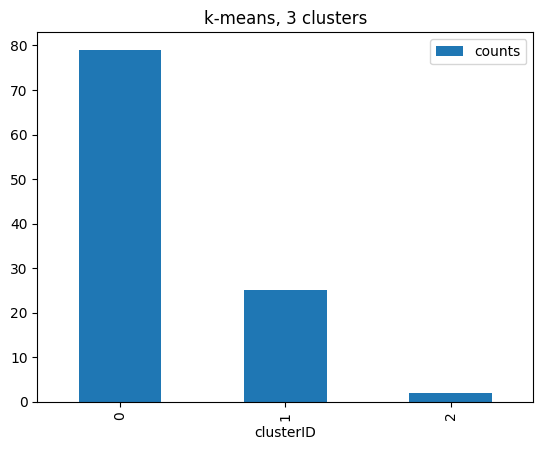

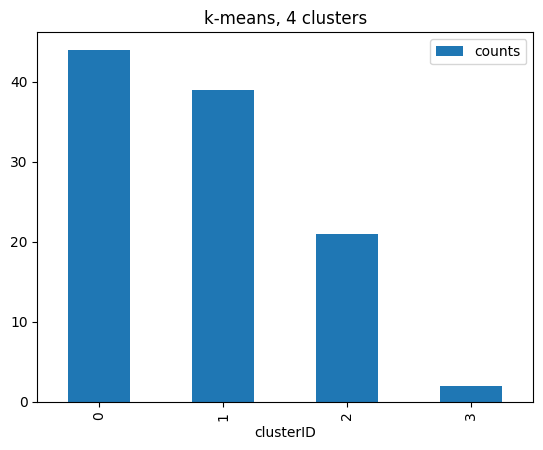

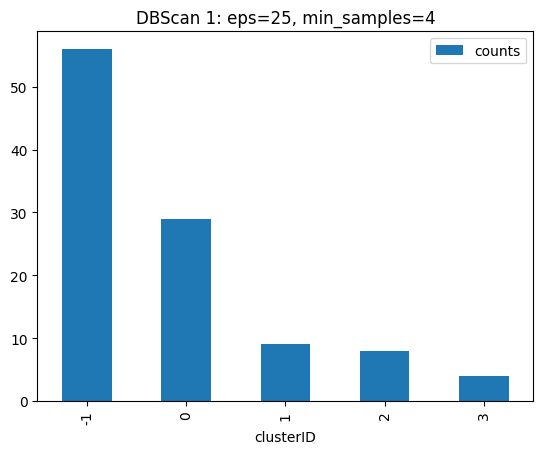

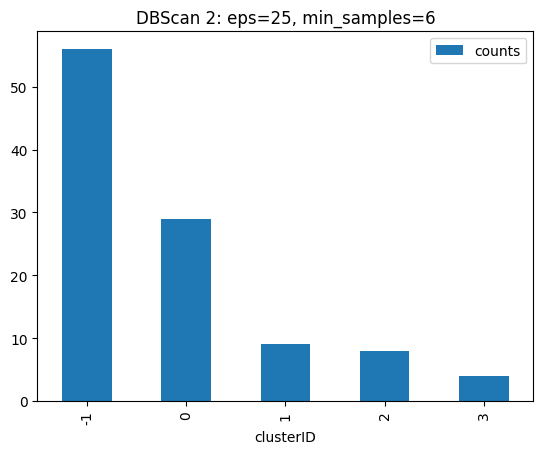

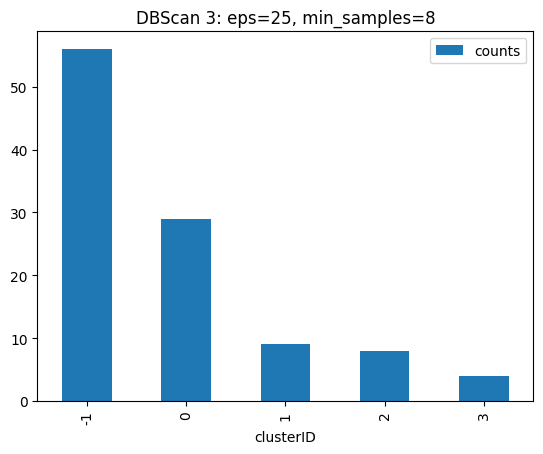

In [18]:
# Want to only look at each station once per algorithm, so let's filter out duplicates
k_2_unique = np.unique(k_means_2_clusters.labels_, return_counts=True)
k_3_unique = np.unique(k_means_3_clusters.labels_, return_counts=True)
k_4_unique = np.unique(k_means_4_clusters.labels_, return_counts=True)
db_1_unique = np.unique(dbscan_1.labels_, return_counts=True)
db_2_unique = np.unique(dbscan_2.labels_, return_counts=True)
db_3_unique = np.unique(dbscan_3.labels_, return_counts=True)

# Now, generate each bar plot per algorithm option

# Need to somehow sort the values such that the first clusterID is the biggest cluster. Make a DF for each algorithm

# Do for k means
df_k_2 = pd.DataFrame(data=k_2_unique[1], columns=['counts']).sort_values(by='counts', ascending=False)
df_k_2['clusterID'] = [0, 1]
df_k_3 = pd.DataFrame(data=k_3_unique[1], columns=['counts']).sort_values(by='counts', ascending=False)
df_k_3['clusterID'] = [0, 1, 2]
df_k_4 = pd.DataFrame(data=k_4_unique[1], columns=['counts']).sort_values(by='counts', ascending=False)
df_k_4['clusterID'] = [0, 1, 2, 3]

# Now for DBScan
df_db_1 = pd.DataFrame(data=db_1_unique[1], columns=['counts']).sort_values(by='counts', ascending=False)
df_db_1['clusterID'] = db_1_unique[0]
df_db_2 = pd.DataFrame(data=db_2_unique[1], columns=['counts']).sort_values(by='counts', ascending=False)
df_db_2['clusterID'] = db_2_unique[0]
df_db_3 = pd.DataFrame(data=db_3_unique[1], columns=['counts']).sort_values(by='counts', ascending=False)
df_db_3['clusterID'] = db_3_unique[0]

# Now, plot the bar charts
df_k_2.plot(kind='bar', x='clusterID', y='counts')
plt.title('k-means, 2 clusters')
plt.show()

df_k_3.plot(kind='bar', x='clusterID', y='counts')
plt.title('k-means, 3 clusters')
plt.show()

df_k_4.plot(kind='bar', x='clusterID', y='counts')
plt.title('k-means, 4 clusters')
plt.show()

df_db_1.plot(kind='bar', x='clusterID', y='counts')
plt.title(f'DBScan 1: eps={eps}, min_samples={samples[0]}')
plt.show()

df_db_2.plot(kind='bar', x='clusterID', y='counts')
plt.title(f'DBScan 2: eps={eps}, min_samples={samples[1]}')
plt.show()

df_db_3.plot(kind='bar', x='clusterID', y='counts')
plt.title(f'DBScan 3: eps={eps}, min_samples={samples[2]}')
plt.show()

### Task 4.3

**Task 4.3** You should provide a brief explanation about your optimal choice of K. You should utilize the Elbow method on a reasonable range of K values. You should also mention what is the best value of K that you found.

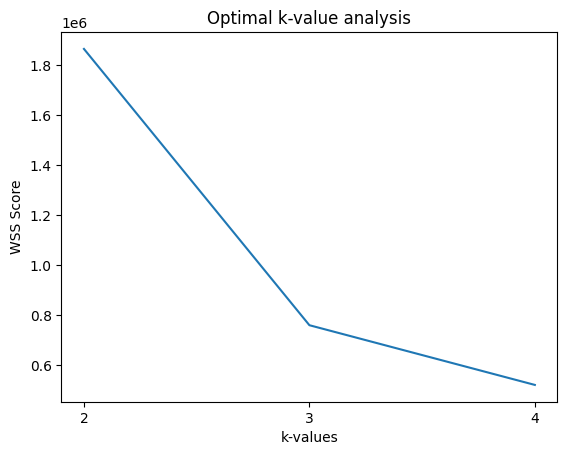

In [19]:
# Plot the wss scores against the k values
k_vals = [2, 3, 4]

fig, axes = plt.subplots()

axes.plot(k_vals, wss_scores)
axes.set_xticks(k_vals)

axes.set_xlabel('k-values')
axes.set_ylabel('WSS Score')
axes.set_title('Optimal k-value analysis')

plt.show()

Given the three values I selected for using k-means clustering, I would choose k=4. This is because (given the method of scoring I chose for the analysis) the minimum value in the above plot is k=4. The elbow method utilizes an absolute minima selection at the value of k where the WSS Score is an absolute minimum. In this case, it turns out to be k=4. If I use more k-value samples, I may find a higher number of clusters provides a better clustering. The only way to tell is to repeat this process, but with more options for k-value. In that case, simply choose the k-value that minimizes the WSS Score.

### Task 4.4

**Task 4.4** Given the analysis you've done, which of the two algorithms you think is the best for this dataset (along with the chosen parameters)? Please explain briefly why. It is possible the results will be inconclusive.

I think in this project, k-means would be the better option. You are able to easily tell when k-means overclusters and it is easy to optimize the algorithm. The dataset is also quite large across 3 files, which DBScan is not really good at handling efficiently. In my analysis, I may have not optimized DBScan, which may be the cause of why each cluster is shaped similarly in each of the bar plots. However, the analysis we did did not require DBScan to be optimized in the way we did with k-means. So, given the analysis that has been done so far, I would choose k-means.